
<a id='rob-markov-perf'></a>
<div id="qe-notebook-header" align="right" style="text-align:right;">
        <a href="https://quantecon.org/" title="quantecon.org">
                <img style="width:250px;display:inline;" width="250px" src="https://assets.quantecon.org/img/qe-menubar-logo.svg" alt="QuantEcon">
        </a>
</div>

# Robust Markov Perfect Equilibrium

## Contents

- [Robust Markov Perfect Equilibrium](#Robust-Markov-Perfect-Equilibrium)  
  - [Overview](#Overview)  
  - [Linear Markov perfect equilibria with robust agents](#Linear-Markov-perfect-equilibria-with-robust-agents)  
  - [Application](#Application)  

**Co-author: Dongchen Zou**

In addition what’s in Anaconda, this lecture will need the following libraries

In [1]:
!pip install quantecon

## Overview


<a id='index-0'></a>
This lecture describes  a Markov perfect equilibrium  with robust agents

We  focus on special settings with

- two players  
- quadratic payoff functions  
- linear transition rules for the state vector  


These specifications simplify calculations and allow us to give a simple example that illustrates basic  forces

This lecture is based on ideas described in chapter 15 of  [[HS08]](https://lectures.quantecon.org/py/zreferences.html#hansensargent2008) and in [Markov perfect equilibrium](https://lectures.quantecon.org/py/markov_perf.html)
and [Robustness](https://lectures.quantecon.org/py/robustness.html)

### Basic setup

Decisions of two agents affect the motion of a  state vector
that appears as an argument of   payoff functions of both agents

As described in [Markov perfect equilibrium](https://lectures.quantecon.org/py/markov_perf.html), when decision makers have no concerns about the robustness of their decision rules
to misspecifications of the state dynamics, a Markov perfect equilibrium  can be computed via
backwards recursion  on  two sets of equations

> - a pair of Bellman equations, one for each agent  
- a pair of equations that express linear decision rules for each agent as functions of that agent’s  continuation value function as well as parameters of
  preferences and state transition matrices  



This lecture shows how  a similar equilibrium concept and similar computational  procedures
apply when we impute concerns about robustness to both decision makers

A Markov perfect equilibrium with robust agents will be characterized by

> - a pair of Bellman equations, one for each agent  
- a pair of equations that express linear decision rules for each agent as functions of that agent’s  continuation value function as well as parameters of
  preferences and state transition matrices  
- a pair of equations that express linear decision rules for worst-case shocks for each agent as functions of that agent’s  continuation value function as well as parameters of
  preferences and state transition matrices  



Below, we’ll construct robust firms version of the   classic duopoly model with
adjustment costs analyzed in [Markov perfect equilibrium](https://lectures.quantecon.org/py/markov_perf.html)

## Linear Markov perfect equilibria with robust agents


<a id='index-1'></a>
As we saw in  [Markov perfect equilibrium](https://lectures.quantecon.org/py/markov_perf.html), the study of Markov perfect equilibria in dynamic games with two players
leads us to an interrelated pair of Bellman equations

In linear quadratic dynamic games, these “stacked Bellman equations” become “stacked Riccati equations” with a tractable mathematical structure

### Modified coupled linear regulator problems

We consider a general linear quadratic regulator game with two players, each of whom fears model misspecificationyers

We often call the players agents

The agents share a common baseline model for the transition dynamics of the state vector

> - this is a counterpart of a ‘rational expectations’ assumption of shared beliefs  



But now one or more agents doubt that the baseline model is correctly specified

The agents express the possibility that their baseline specification is incorrect by adding a contribution $ C v_{it} $ to the time $ t $ transition law for the state

> - $ C $ is the usual *volatility matrix* that appears in stochastic versions of optimal linear regulator problems  
- $ v_{it} $ is a possibly history-dependent vector of distortions to the dynamics of the state that agent $ i $ uses to  represent misspecification of the original model  



For convenience, we’ll start with a finite horizon formulation, where $ t_0 $ is the initial date and $ t_1 $ is the common terminal date

Player $ i $ takes a sequence $ \{u_{-it}\} $ as given and chooses a sequence $ \{u_{it}\} $ to minimize and $ \{v_{it}\} $ to maximize


<a id='equation-rmp-orig-1'></a>
$$
\sum_{t=t_0}^{t_1 - 1}
\beta^{t - t_0}
\left\{
    x_t' R_i x_t +
    u_{it}' Q_i u_{it} +
    u_{-it}' S_i u_{-it} +
    2 x_t' W_i u_{it} +
    2 u_{-it}' M_i u_{it} -
    \theta_i v_{it}' v_{it}
\right\} \tag{1}
$$

while  thinking that the state evolves according to


<a id='equation-rmp-orig-0'></a>
$$
x_{t+1} = A x_t + B_1 u_{1t} + B_2 u_{2t} + C v_{it} \tag{2}
$$

Here

- $ x_t $ is an $ n \times 1 $ state vector,   $ u_{it} $ is a $ k_i \times 1 $ vector of controls for player $ i $, and  
- $ v_{it} $ is an $ h \times 1 $ vector of distortions to the state dynamics that concern  player $ i $  
- $ R_i $ is $ n \times n $  
- $ S_i $ is $ k_{-i} \times k_{-i} $  
- $ Q_i $ is $ k_i \times k_i $  
- $ W_i $ is $ n \times k_i $  
- $ M_i $ is $ k_{-i} \times k_i $  
- $ A $ is $ n \times n $  
- $ B_i $ is $ n \times k_i $  
- $ C $ is $ n \times h $  
- $ \theta_i \in [\underline \theta_i, +\infty] $ is a scalar multiplier parameter of player $ i $  


If $ \theta_i = + \infty $, player $ i $ completely trusts the baseline model

If $ \theta_i < _\infty $, player $ i $ suspects that some other unspecified model actually governs the transition dynamics

The term $ \theta_i v_{it}' v_{it} $ is a time $ t $ contribution to an entropy penalty that an (imaginary) loss-maximizing agent inside
agent $ i $‘s mind charges for distorting the law of motion in a way that harms agent $ i $

> - the imaginary loss-maximizing  agent helps the loss-minimizing agent by helping him construct bounds on the behavior of his decision rule over a
  large **set** of alternative models of state transition dynamics  

### Computing Equilibrium

We formulate a linear robust Markov perfect equilibrium as follows

Player $ i $ employs linear decision rules $ u_{it} = - F_{it} x_t $, where $ F_{it} $ is a $ k_i \times n $ matrix

Player $ i $‘s malevolent alter ego employs decision rules $ v_{it} = K_{it} x_t $ where $ K_{it} $ is an  $ h \times n $ matrix

A robust Markov perfect equilibrium is a pair of sequences $ \{F_{1t}, F_{2t}\} $ and  a pair of sequences $ \{K_{1t}, K_{2t}\} $ over $ t = t_0, \ldots, t_1 - 1 $ that satisfy

- $ \{F_{1t}, K_{1t}\} $ solves player 1’s robust decision problem, taking $ \{F_{2t}\} $ as given, and  
- $ \{F_{2t}, K_{2t}\} $ solves player 2’s robust decision problem, taking $ \{F_{1t}\} $ as given  


If we substitute $ u_{2t} = - F_{2t} x_t $  into [(1)](#equation-rmp-orig-1) and [(2)](#equation-rmp-orig-0), then player 1’s problem becomes minimization-maximization of


<a id='equation-rmp-eq-mpe-p1p'></a>
$$
\sum_{t=t_0}^{t_1 - 1}
\beta^{t - t_0}
    \left\{
    x_t' \Pi_{1t} x_t +
    u_{1t}' Q_1 u_{1t} +
    2 u_{1t}' \Gamma_{1t} x_t -
    \theta_1 v_{1t}' v_{1t}
    \right\} \tag{3}
$$

subject to


<a id='equation-rmp-eq-mpe-p1d'></a>
$$
x_{t+1} = \Lambda_{1t} x_t + B_1 u_{1t} + C v_{1t} \tag{4}
$$

where

- $ \Lambda_{it} := A - B_{-i} F_{-it} $  
- $ \Pi_{it} := R_i + F_{-it}' S_i F_{-it} $  
- $ \Gamma_{it} := W_i' - M_i' F_{-it} $  


This is an LQ robust dynamic programming problem of the type studied in the [Robustness](https://lectures.quantecon.org/py/robustness.html) lecture,
which can be solved by working backwards

Maximization with respect to distortion  $ v_{1t} $ leads to  the following version of the $ \mathcal D $ operator from
the [Robustness](https://lectures.quantecon.org/py/robustness.html) lecture, namely


<a id='equation-rmp-rb-d'></a>
$$
\mathcal D_1(P) := P + PC (\theta_1 I - C' P C)^{-1} C' P \tag{5}
$$

The matrix $ F_{1t} $ in the policy rule $ u_{1t} = - F_{1t} x_t $ that solves agent 1’s  problem satisfies


<a id='equation-rmp-orig-3'></a>
$$
F_{1t}
= (Q_1 + \beta B_1' {\mathcal D}_1( P_{1t+1}) B_1)^{-1}
(\beta B_1' {\mathcal D}_1( P_{1t+1}) \Lambda_{1t} + \Gamma_{1t}) \tag{6}
$$

where $ P_{1t} $ solves the matrix Riccati difference equation


<a id='equation-rmp-orig-4'></a>
$$
P_{1t} =
\Pi_{1t} -
(\beta B_1' {\mathcal D}_1(P_{1t+1}) \Lambda_{1t} + \Gamma_{1t})' (Q_1 + \beta B_1' {\mathcal D}_1( P_{1t+1}) B_1)^{-1}
(\beta B_1' {\mathcal D}_1(P_{1t+1}) \Lambda_{1t} + \Gamma_{1t}) +
\beta \Lambda_{1t}' {\mathcal D}_1(P_{1t+1}) \Lambda_{1t} \tag{7}
$$

Similarly, the policy that solves player 2’s problem is


<a id='equation-rmp-orig-5'></a>
$$
F_{2t} = (Q_2 + \beta B_2' {\mathcal D}_2( P_{2t+1} ) B_2)^{-1}
(\beta B_2' {\mathcal D}_2 (P_{2t+1}) \Lambda_{2t} + \Gamma_{2t}) \tag{8}
$$

where $ P_{2t} $ solves


<a id='equation-rmp-orig-6'></a>
$$
P_{2t} =
\Pi_{2t} - (\beta B_2' {\mathcal D}_2 ( P_{2t+1}) \Lambda_{2t} + \Gamma_{2t})' (Q_2 + \beta B_2' {\mathcal D}_2 ( P_{2t+1}) B_2)^{-1}
  (\beta B_2' {\mathcal D}_2 ( P_{2t+1}) \Lambda_{2t} + \Gamma_{2t}) + \beta \Lambda_{2t}' {\mathcal D}_2 ( P_{2t+1})  \Lambda_{2t} \tag{9}
$$

Here in all cases $ t = t_0, \ldots, t_1 - 1 $ and the terminal conditions are $ P_{it_1} = 0 $

The solution procedure is to use equations [(6)](#equation-rmp-orig-3), [(7)](#equation-rmp-orig-4), [(8)](#equation-rmp-orig-5), and [(9)](#equation-rmp-orig-6), and “work backwards” from time $ t_1 - 1 $

Since we’re working backwards, $ P_{1t+1} $ and $ P_{2t+1} $ are taken as given at each stage

Moreover, since

- some terms on the right hand side of [(6)](#equation-rmp-orig-3) contain $ F_{2t} $  
- some terms on the right hand side of [(8)](#equation-rmp-orig-5) contain $ F_{1t} $  


we need to solve these $ k_1 + k_2 $ equations simultaneously

### Key insight

As in [Markov perfect equilibrium](https://lectures.quantecon.org/py/markov_perf.html), a key insight here  is that  equations  [(6)](#equation-rmp-orig-3) and [(8)](#equation-rmp-orig-5) are linear in $ F_{1t} $ and $ F_{2t} $

After these equations have been solved, we can take  $ F_{it} $ and solve for $ P_{it} $ in [(7)](#equation-rmp-orig-4) and [(9)](#equation-rmp-orig-6)

Notice how $ j $‘s control law $ F_{jt} $ is a function of $ \{F_{is}, s \geq t, i \neq j \} $

Thus, agent $ i $‘s choice of $ \{F_{it}; t = t_0, \ldots, t_1 - 1\} $ influences agent $ j $‘s choice of control laws

However, in the Markov perfect equilibrium of this game, each agent is assumed to ignore the influence that his choice exerts on the other agent’s choice

After these equations have been solved, we can also deduce associated sequences of worst-case shocks

### Worst-case shocks

For agent $ i $ the maximizing or worst-case shock $ v_{it} $ is

$$
v_{it} = K_{it} x_t
$$

where

$$
K_{it} = \theta_i^{-1} (I - \theta_i^{-1} C' P_{i,t+1} C)^{-1} C' P_{i,t+1} (A - B_1 F_{it} - B_2 F_{2t})
$$

### Infinite horizon

We often want to compute the solutions of such games for infinite horizons, in the hope that the decision rules $ F_{it} $ settle down to be time invariant as $ t_1 \rightarrow +\infty $

In practice, we usually fix $ t_1 $ and compute the equilibrium of an infinite horizon game by driving $ t_0 \rightarrow - \infty $

This is the approach we adopt in the next section

### Implementation

We use the function nnash_robust to compute a
Markov perfect equilibrium of the infinite horizon linear quadratic dynamic
game with robust planers in the manner described above

## Application


<a id='index-2'></a>

### A duopoly model

Without concerns for robustness, the model is identical to the duopoly model from the [Markov perfect equilibrium](https://lectures.quantecon.org/py/markov_perf.html) lecture

To begin, we briefly review the structure of that model

Two firms are the only producers of a good the demand for which is governed by a linear inverse demand function


<a id='equation-rgame2'></a>
$$
p = a_0 - a_1 (q_1 +  q_2) \tag{10}
$$

Here $ p = p_t $ is the price of the good, $ q_i = q_{it} $ is the output of firm $ i=1,2 $ at time $ t $ and $ a_0 > 0, a_1 >0 $

In [(10)](#equation-rgame2) and what follows,

- the time subscript is suppressed when possible to simplify notation  
- $ \hat x $ denotes a next period value of variable $ x $  


Each firm recognizes that its output affects total output and therefore the market price

The one-period payoff function of firm $ i $ is price times quantity minus adjustment costs:


<a id='equation-rgame1'></a>
$$
\pi_i = p q_i - \gamma (\hat q_i - q_i)^2, \quad \gamma > 0 , \tag{11}
$$

Substituting the inverse demand curve [(10)](#equation-rgame2) into [(11)](#equation-rgame1) lets us express the one-period payoff as


<a id='equation-rgame3'></a>
$$
\pi_i(q_i, q_{-i}, \hat q_i) = a_0 q_i - a_1 q_i^2 - a_1 q_i q_{-i} - \gamma (\hat q_i - q_i)^2 , \tag{12}
$$

where $ q_{-i} $ denotes the output of the firm other than $ i $

The objective of the firm is to maximize $ \sum_{t=0}^\infty \beta^t \pi_{it} $

Firm $ i $ chooses a decision rule that sets next period quantity $ \hat q_i $ as a function $ f_i $ of the current state $ (q_i, q_{-i}) $

This completes our review of the duopoly model without concerns for robustness

Now we activate robustness  concerns of both firms

To map a robust version of the duopoly model  into  coupled robust linear-quadratic dynamic programming
problems, we again define the state and controls as

$$
x_t :=
\begin{bmatrix}
    1 \\
    q_{1t} \\
    q_{2t}
\end{bmatrix}
\quad \text{and} \quad
u_{it} :=
q_{i,t+1} - q_{it}, \quad i=1,2
$$

If we write

$$
x_t' R_i x_t + u_{it}' Q_i u_{it}
$$

where $ Q_1 = Q_2 = \gamma $,

$$
R_1 :=
\begin{bmatrix}
   0              & -\frac{a_0}{2}  & 0 \\
   -\frac{a_0}{2} &  a_1            &  \frac{a_1}{2} \\
   0              &   \frac{a_1}{2} & 0
\end{bmatrix}
\quad \text{and} \quad
R_2 :=
\begin{bmatrix}
   0              & 0             & -\frac{a_0}{2} \\
   0              & 0             & \frac{a_1}{2} \\
   -\frac{a_0}{2} & \frac{a_1}{2} & a_1
\end{bmatrix}
$$

then we recover the  one-period  payoffs [(11)](#equation-rgame1) for the two firms in the duopoly model

The law of motion for the state $ x_t $ is $ x_{t+1} = A x_t + B_1 u_{1t} + B_2 u_{2t} $ where

$$
A :=
\begin{bmatrix}
   1 & 0 & 0 \\
   0 & 1 & 0 \\
   0 & 0 & 1
\end{bmatrix},
\quad
B_1 :=
\begin{bmatrix}
       0 \\
       1 \\
       0
\end{bmatrix},
\quad
B_2 :=
\begin{bmatrix}
            0 \\
            0 \\
            1
\end{bmatrix}
$$

A robust  decision rule of firm $ i $ will take the form $ u_{it} = - F_i x_t $, inducing the following closed loop system for the evolution of $ x $ in the Markov perfect equilibrium:


<a id='equation-rmp-eq-mpe-cle'></a>
$$
x_{t+1} = (A - B_1 F_1 -B_1 F_2 ) x_t \tag{13}
$$

### Parameters and Solution

Consider the  duopoly model with parameter values of:

- $ a_0 = 10 $  
- $ a_1 = 2 $  
- $ \beta = 0.96 $  
- $ \gamma = 12 $  


From these we computed the infinite horizon MPE without robustness  using the  code

In [2]:
"""

@authors: Chase Coleman, Thomas Sargent, John Stachurski

"""
import numpy as np
import quantecon as qe

# == Parameters == #
a0 = 10.0
a1 = 2.0
β = 0.96
γ = 12.0

# == In LQ form == #
A = np.eye(3)
B1 = np.array([[0.], [1.], [0.]])
B2 = np.array([[0.], [0.], [1.]])


R1 = [[      0.,     -a0 / 2,          0.],
      [-a0 / 2.,          a1,     a1 / 2.],
      [       0,     a1 / 2.,          0.]]

R2 = [[     0.,           0.,      -a0 / 2],
      [     0.,           0.,      a1 / 2.],
      [-a0 / 2,      a1 / 2.,           a1]]

Q1 = Q2 = γ
S1 = S2 = W1 = W2 = M1 = M2 = 0.0

# == Solve using QE's nnash function == #
F1, F2, P1, P2 = qe.nnash(A, B1, B2, R1, R2, Q1, 
                          Q2, S1, S2, W1, W2, M1, 
                          M2, beta=β)

# == Display policies == #
print("Computed policies for firm 1 and firm 2:\n")
print(f"F1 = {F1}")
print(f"F2 = {F2}")
print("\n")

Computed policies for firm 1 and firm 2:

F1 = [[-0.66846615  0.29512482  0.07584666]]
F2 = [[-0.66846615  0.07584666  0.29512482]]




#### Markov Perfect Equilibrium with Robustness

We add robustness concerns to the Markov Perfect Equilibrium model by
extending the function `qe.nnash`
([link](https://github.com/QuantEcon/QuantEcon.py/blob/master/quantecon/lqnash.py))
into a robustness version by adding the maximization operator
$ \mathcal D(P) $ into the backward induction

The MPE with robustness function is `nnash_robust`

The function’s code is as follows

In [3]:
from scipy.linalg import solve
import matplotlib.pyplot as plt
%matplotlib inline

def nnash_robust(A, C, B1, B2, R1, R2, Q1, Q2, S1, S2, W1, W2, M1, M2,
                 θ1, θ2, beta=1.0, tol=1e-8, max_iter=1000):
    r"""
    Compute the limit of a Nash linear quadratic dynamic game with
    robustness concern.

    In this problem, player i minimizes
    .. math::
        \sum_{t=0}^{\infty}
        \left\{
            x_t' r_i x_t + 2 x_t' w_i
            u_{it} +u_{it}' q_i u_{it} + u_{jt}' s_i u_{jt} + 2 u_{jt}'
            m_i u_{it}
        \right\}
    subject to the law of motion
    .. math::
        x_{it+1} = A x_t + b_1 u_{1t} + b_2 u_{2t} + C w_{it+1}
    and a perceived control law :math:`u_j(t) = - f_j x_t` for the other
    player.

    The player i also concerns about the model misspecification,
    and maximizes
    .. math::
        \sum_{t=0}^{\infty}
        \left\{
            \beta^{t+1} \theta_{i} w_{it+1}'w_{it+1}
        \right\}

    The solution computed in this routine is the :math:`f_i` and
    :math:`P_i` of the associated double optimal linear regulator
    problem.

    Parameters
    ----------
    A : scalar(float) or array_like(float)
        Corresponds to the MPE equations, should be of size (n, n)
    C : scalar(float) or array_like(float)
        As above, size (n, c), c is the size of w
    B1 : scalar(float) or array_like(float)
        As above, size (n, k_1)
    B2 : scalar(float) or array_like(float)
        As above, size (n, k_2)
    R1 : scalar(float) or array_like(float)
        As above, size (n, n)
    R2 : scalar(float) or array_like(float)
        As above, size (n, n)
    Q1 : scalar(float) or array_like(float)
        As above, size (k_1, k_1)
    Q2 : scalar(float) or array_like(float)
        As above, size (k_2, k_2)
    S1 : scalar(float) or array_like(float)
        As above, size (k_1, k_1)
    S2 : scalar(float) or array_like(float)
        As above, size (k_2, k_2)
    W1 : scalar(float) or array_like(float)
        As above, size (n, k_1)
    W2 : scalar(float) or array_like(float)
        As above, size (n, k_2)
    M1 : scalar(float) or array_like(float)
        As above, size (k_2, k_1)
    M2 : scalar(float) or array_like(float)
        As above, size (k_1, k_2)
    θ1 : scalar(float)
            Robustness parameter of player 1
    θ2 : scalar(float)
            Robustness parameter of player 2
    beta : scalar(float), optional(default=1.0)
          Discount rate
    tol : scalar(float), optional(default=1e-8)
         This is the tolerance level for convergence
    max_iter : scalar(int), optional(default=1000)
        This is the maximum number of iterations allowed

    Returns
    -------
    F1 : array_like, dtype=float, shape=(k_1, n)
        Feedback law for agent 1
    F2 : array_like, dtype=float, shape=(k_2, n)
        Feedback law for agent 2
    P1 : array_like, dtype=float, shape=(n, n)
        The steady-state solution to the associated discrete matrix
        Riccati equation for agent 1
    P2 : array_like, dtype=float, shape=(n, n)
        The steady-state solution to the associated discrete matrix
        Riccati equation for agent 2
    """
    # == Unload parameters and make sure everything is a matrix == #
    params = A, C, B1, B2, R1, R2, Q1, Q2, S1, S2, W1, W2, M1, M2
    params = map(np.asmatrix, params)
    A, C, B1, B2, R1, R2, Q1, Q2, S1, S2, W1, W2, M1, M2 = params


    # == Multiply A, B1, B2 by sqrt(β) to enforce discounting == #
    A, B1, B2 = [np.sqrt(β) * x for x in (A, B1, B2)]

    # == Initial values == #
    n = A.shape[0]
    k_1 = B1.shape[1]
    k_2 = B2.shape[1]

    v1 = np.eye(k_1)
    v2 = np.eye(k_2)
    P1 = np.eye(n) * 1e-5
    P2 = np.eye(n) * 1e-5
    F1 = np.random.randn(k_1, n)
    F2 = np.random.randn(k_2, n)


    for it in range(max_iter):
        # update
        F10 = F1
        F20 = F2

        I = np.eye(C.shape[1])

        # D1(P1)
        # Note: INV1 may not be solved if the matrix is singular
        INV1 = solve(θ1 * I - C.T @ P1 @ C, I)
        D1P1 =  P1 + P1 @ C @ INV1 @ C.T @ P1

        # D2(P2)
        # Note: INV2 may not be solved if the matrix is singular
        INV2 = solve(θ2 * I - C.T @ P2 @ C, I)
        D2P2 =  P2 + P2 @ C @ INV2 @ C.T @ P2

        G2 = solve(Q2 + B2.T @ D2P2 @ B2, v2)
        G1 = solve(Q1 + B1.T @ D1P1 @ B1, v1)
        H2 = G2 @ B2.T @ D2P2
        H1 = G1 @ B1.T @ D1P1

        # break up the computation of F1, F2
        F1_left = v1 - (H1 @ B2 + G1 @ M1.T) @ (H2 @ B1 + G2 @ M2.T)
        F1_right = H1 @ A + G1 @ W1.T - \
                   (H1 @ B2 + G1 @ M1.T) @ (H2 @ A + G2 @ W2.T)
        F1 = solve(F1_left, F1_right)
        F2 = H2 @ A + G2 @ W2.T - (H2 @ B1 + G2 @ M2.T) @ F1

        Λ1 = A - B2 @ F2
        Λ2 = A - B1 @ F1
        Π1 = R1 + F2.T @ S1 @ F2
        Π2 = R2 + F1.T @ S2 @ F1
        Γ1 = W1.T - M1.T @ F2
        Γ2 = W2.T - M2.T @ F1

        # Compute P1 and P2
        P1 = Π1 - (B1.T @ D1P1 @ Λ1 + Γ1).T @ F1 + \
             Λ1.T @ D1P1 @ Λ1
        P2 = Π2 - (B2.T @ D2P2 @ Λ2 + Γ2).T @ F2 + \
             Λ2.T @ D2P2 @ Λ2

        dd = np.max(np.abs(F10 - F1)) + np.max(np.abs(F20 - F2))

        if dd < tol:  # success!
            break

    else:
        raise ValueError(f'No convergence: Iteration limit of {maxiter} reached in nnash')

    return F1, F2, P1, P2

### Some details

Firm  $ i $ wants to minimize

$$
\sum_{t=t_0}^{t_1 - 1}
\beta^{t - t_0}
\left\{
    x_t' R_i x_t +
    u_{it}' Q_i u_{it} +
    u_{-it}' S_i u_{-it} +
    2 x_t' W_i u_{it} +
    2 u_{-it}' M_i u_{it}
\right\}
$$

where

$$
\begin{split}
x_t :=
\begin{bmatrix}
    1 \\
    q_{1t} \\
    q_{2t}
\end{bmatrix}
\quad \text{and} \quad
u_{it} :=
q_{i,t+1} - q_{it}, \quad i=1,2
\end{split}
$$

and

$$
\begin{split}
R_1 :=
\begin{bmatrix}
   0              & -\frac{a_0}{2}  & 0 \\
   -\frac{a_0}{2} &  a_1            &  \frac{a_1}{2} \\
   0              &   \frac{a_1}{2} & 0
\end{bmatrix}
\text{,} \quad
R_2 :=
\begin{bmatrix}
   0              & 0             & -\frac{a_0}{2} \\
   0              & 0             & \frac{a_1}{2} \\
   -\frac{a_0}{2} & \frac{a_1}{2} & a_1
\end{bmatrix}
\text{,} \quad
Q_1 = Q_2 = \gamma
\text{,} \quad
S_1 = S_2 = 0
\text{,} \quad
W_1 = W_2 = 0
\text{,} \quad
M_1 = M_2 = 0
\end{split}
$$

The parameters of the duopoly model are:

> - $ a_0 = 10 $  
- $ a_1 = 2 $  
- $ \beta = 0.96 $  
- $ \gamma = 12 $  

In [4]:
# == Parameters == #
a0 = 10.0
a1 = 2.0
β = 0.96
γ = 12.0


# == In LQ form == #
A = np.eye(3)
B1 = np.array([[0.], [1.], [0.]])
B2 = np.array([[0.], [0.], [1.]])


R1 = [[      0.,     -a0 / 2,          0.],
      [-a0 / 2.,          a1,     a1 / 2.],
      [       0,     a1 / 2.,          0.]]

R2 = [[     0.,           0.,      -a0 / 2],
      [     0.,           0.,      a1 / 2.],
      [-a0 / 2,      a1 / 2.,           a1]]

Q1 = Q2 = γ
S1 = S2 = W1 = W2 = M1 = M2 = 0.0

#### Consistency check

We first conduct a comparison test to check if `nnash_robust` agrees
with `qe.nnash` in the non-robustness case in which each $ \theta_i \approx +\infty $

In [5]:
# == Solve using QE's nnash function == #
F1, F2, P1, P2 = qe.nnash(A, B1, B2, R1, R2, Q1,
                          Q2, S1, S2, W1, W2, M1,
                          M2, beta=β)

# == Solve using nnash_robust == #
F1r, F2r, P1r, P2r = nnash_robust(A, np.zeros((3, 1)), B1, B2, R1, R2, Q1,
                                  Q2, S1, S2, W1, W2, M1, M2, 1e-10,
                                  1e-10, beta=β)

print('F1 and F1r should be the same: ', np.allclose(F1, F1r))
print('F2 and F2r should be the same: ', np.allclose(F1, F1r))
print('P1 and P1r should be the same: ', np.allclose(P1, P1r))
print('P2 and P2r should be the same: ', np.allclose(P1, P1r))

F1 and F1r should be the same:  True
F2 and F2r should be the same:  True
P1 and P1r should be the same:  True
P2 and P2r should be the same:  True


We can see that the results are consistent across the two functions

#### Comparative dynamics under baseline transition dynamics

We want to compare the dynamics of price and output under the baseline
MPE model with those under the baseline model under the robust decision rules within the robust MPE

This means that we simulate the state dynamics under the MPE  equilibrium **closed loop** transition matrix

$$
A^o = A - B_1 F_1 - B_2 F_2
$$

where $ F_1 $ and $ F_2 $ are the firms’ robust decision rules within the robust markov_perfect equilibrium

> - by simulating under the baseline model transition dynamics and the robust MPE rules we are in assuming that at the end of the day
  firms’ concerns about misspcification of the baseline model do not materialize  
- a short way of saying this is that misspecification fears are all ‘just in the minds’ of the firms  
- simulating under the baseline model is a common practice in the literature  
- note that *some* assumption about the model that actually governs the data has to be made in order to create a simulation  
- later we will describe the (erroneous) beliefs of the two firms  that justify their robust decisions as best responses to transition
  laws that are distorted relative to the baseline model  



After simulating $ x_t $ under the baseline transition dynamics and robust decision rules $ F_i, i = 1, 2 $, we
extract and plot industry output $ q_t=q_{1t}+q_{2t} $ and price $ p_t = a_0 − a_1 q_t $

Here we set the robustness and volatility matrix parameters as follows:

- $ \theta_1 = 0.02 $  
- $ \theta_2 = 0.04 $  
- $ C = \begin{pmatrix} 0 \\ 0.01 \\ 0.01 \end{pmatrix} $  


Because we have set $ \theta_1 < \theta_2 < + \infty $ we know that

> - both firms fear that the baseline specification of the state transition dynamics are incorrect  
- firm $ 1 $ fears misspecification more than firm $ 2 $  

In [6]:
# == Robustness parameters and matrix == #
C = np.asmatrix([[0], [0.01], [0.01]])
θ1 = 0.02
θ2 = 0.04
n = 20


# == Solve using nnash_robust == #
F1r, F2r, P1r, P2r = nnash_robust(A, C, B1, B2, R1, R2, Q1,
                                  Q2, S1, S2, W1, W2, M1, M2,
                                  θ1, θ2, beta=β)



# == MPE output and price == #
AF = A - B1 @ F1 - B2 @ F2
x = np.empty((3, n))
x[:, 0] = 1, 1, 1
for t in range(n - 1):
    x[:, t + 1] = AF @ x[:, t]
q1 = x[1, :]
q2 = x[2, :]
q = q1 + q2       # Total output, MPE
p = a0 - a1 * q   # Price, MPE


# == RMPE output and price == #
AO = A - B1 @ F1r - B2 @ F2r
xr = np.empty((3, n))
xr[:, 0] = 1, 1, 1
for t in range(n - 1):
    xr[:, t+1] = AO @ xr[:, t]
qr1 = xr[1, :]
qr2 = xr[2, :]
qr = qr1 + qr2      # Total output, RMPE
pr = a0 - a1 * qr   # Price, RMPE

# == RMPE heterogeneous beliefs output and price == #
I = np.eye(C.shape[1])
INV1 = solve(θ1 * I - C.T @ P1 @ C, I)
K1 =  P1 @ C @ INV1 @ C.T @ P1 @ AO
AOCK1 = AO + C.T @ K1

INV2 = solve(θ2 * I - C.T @ P2 @ C, I)
K2 =  P2 @ C @ INV2 @ C.T @ P2 @ AO
AOCK2 = AO + C.T @ K2
xrp1 = np.empty((3, n))
xrp2 = np.empty((3, n))
xrp1[:, 0] = 1, 1, 1
xrp2[:, 0] = 1, 1, 1
for t in range(n - 1):
    xrp1[:, t + 1] = AOCK1 @ xrp1[:, t]
    xrp2[:, t + 1] = AOCK2 @ xrp2[:, t]
qrp11 = xrp1[1, :]
qrp12 = xrp1[2, :]
qrp21 = xrp2[1, :]
qrp22 = xrp2[2, :]
qrp1 = qrp11 + qrp12       # Total output, RMPE from player 1's belief
qrp2 = qrp21 + qrp22       # Total output, RMPE from player 2's belief
prp1 = a0 - a1 * qrp1      # Price, RMPE from player 1's belief
prp2 = a0 - a1 * qrp2      # Price, RMPE from player 2's belief

The following code prepares graphs that compare market-wide output $ q_{1t} + q_{2t} $ and  the price of the good
$ p_t $ under equilibrium decision rules $ F_i, i = 1, 2 $ from an ordinary Markov perfect equilibrium and a the decision rules
under a  Markov perfect equilibrium with robust firms with multiplier parameters $ \theta_i, i = 1,2 $ set as described above

Both industry output and price  are under the transition dynamics associated with the baseline model; only the decision rules $ F_i $ differ across the two
equilibrium objects presented

> 

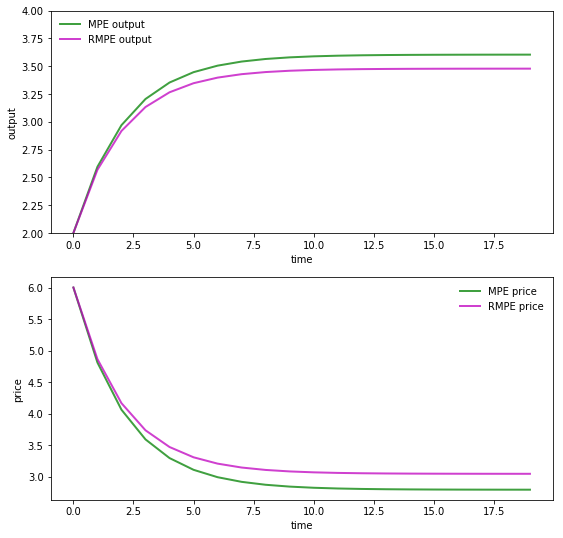

In [7]:
fig, axes = plt.subplots(2, 1, figsize=(9, 9))

ax = axes[0]
ax.plot(q, 'g-', lw=2, alpha=0.75, label='MPE output')
ax.plot(qr, 'm-', lw=2, alpha=0.75, label='RMPE output')
ax.set(ylabel="output", xlabel="time", ylim=(2, 4))
ax.legend(loc='upper left', frameon=0)

ax = axes[1]
ax.plot(p, 'g-', lw=2, alpha=0.75, label='MPE price')
ax.plot(pr, 'm-', lw=2, alpha=0.75, label='RMPE price')
ax.set(ylabel="price", xlabel="time")
ax.legend(loc='upper right', frameon=0)
plt.show()


Under the dynamics associated with the baseline model, the price path is higher with the Markov perfect equilibrium robust decision rules
than it is with decision rules for the ordinary Markov perfect equilibrium

So is the industry output path

To dig a little beneath the forces driving these outcomes, we want to plot $ q_{1t} $
and $ q_{2t} $ in the Markov perfect equilibrium with robust firms and to compare them with corresponding objects
in the Markov perfect equilibrium without robust firms

> 

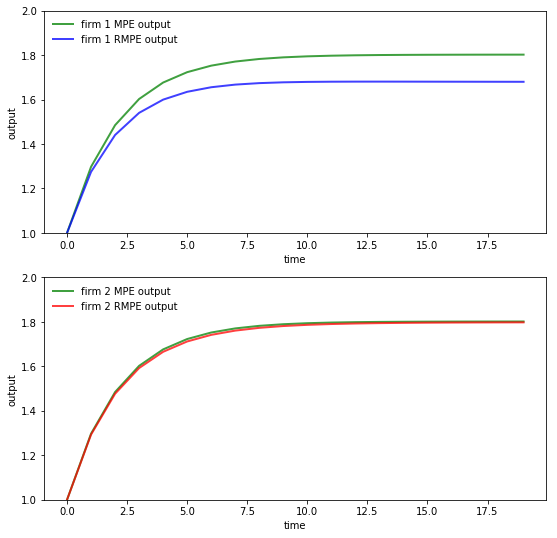

In [8]:
fig, axes = plt.subplots(2, 1, figsize=(9, 9))

ax = axes[0]
ax.plot(q1, 'g-', lw=2, alpha=0.75, label='firm 1 MPE output')
ax.plot(qr1, 'b-', lw=2, alpha=0.75, label='firm 1 RMPE output')
ax.set(ylabel="output", xlabel="time", ylim=(1, 2))
ax.legend(loc='upper left', frameon=0)

ax = axes[1]
ax.plot(q2, 'g-', lw=2, alpha=0.75, label='firm 2 MPE output')
ax.plot(qr2, 'r-', lw=2, alpha=0.75, label='firm 2 RMPE output')
ax.set(ylabel="output", xlabel="time", ylim=(1, 2))
ax.legend(loc='upper left', frameon=0)
plt.show()


Evidently, firm 1’s output path is substantially lower when firms are  robust firms while
firm 2’s output path is virtually the same as it would be in an ordinary  Markov perfect equilibrium with no robust firms

Recall that we have set $ \theta_1 = .02 $ and $ \theta_2 = .04 $, so that firm 1 fears
misspecification of the baseline model substantially more than does firm 2

- but also please notice that firm $ 2 $‘s  behavior in the Markov perfect equilibrium with robust firms responds to the decision rule $ F_1 x_t $
  employed by firm $ 1 $  
- thus it is something of a coincidence that its output is almost the same in the two equilibria  


Larger  concerns about misspecification induce firm 1 to be more cautious than firm 2 in predicting market price and the output of the other firm

To explore this, we study next how *ex post* the two firms’ beliefs about state dynamics differ in  the Markov perfect equilibrium with robust firms

(by *ex post* we mean *after* extremization of each firm’s intertemporal objective)

#### Heterogeneous beliefs

As before, let $A^o = A - B_1 F_1^r - B_2 F_2^r $, where in a robust MPE, $ F_i^r $ is a robust decision rule for firm $ i $

Worst-case forecasts of  $ x_t $ starting from $ t=0 $ differ between the two firms

This means that  worst-case forecasts of industry output $ q_{1t} + q_{2t} $ and price $ p_t $ also differ between the two firms

To find these worst-case beliefs, we compute the following three “closed loop” transition    matrices

> - $ A^o $  
- $A^o + C K_1 $  
- $A^o + C K_2 $  



We call the first transition law, namely, $ A^o $,  the baseline transition under firms’ robust decision rules

We call the second and third worst-case transitions under robust decision
rules for firms 1 and 2

From $ \{x_t\} $ paths generated by  each of these transition laws, we  pull off  associated price and total output sequences

The following code plots them

In [9]:
print('Baseline Robust transition matrix AO is: \n', np.round(AO, 3))
print('Player 1\'s worst-case transition matrix AOCK1 is: \n', np.round(AOCK1, 3))
print('Player 2\'s worst-case transition matrix AOCK2 is: \n', np.round(AOCK2, 3))

Baseline Robust transition matrix AO is: 
 [[ 1.     0.     0.   ]
 [ 0.666  0.682 -0.074]
 [ 0.671 -0.071  0.694]]
Player 1's worst-case transition matrix AOCK1 is: 
 [[ 0.998  0.002  0.   ]
 [ 0.664  0.685 -0.074]
 [ 0.669 -0.069  0.694]]
Player 2's worst-case transition matrix AOCK2 is: 
 [[ 0.999  0.     0.001]
 [ 0.665  0.683 -0.073]
 [ 0.67  -0.071  0.695]]


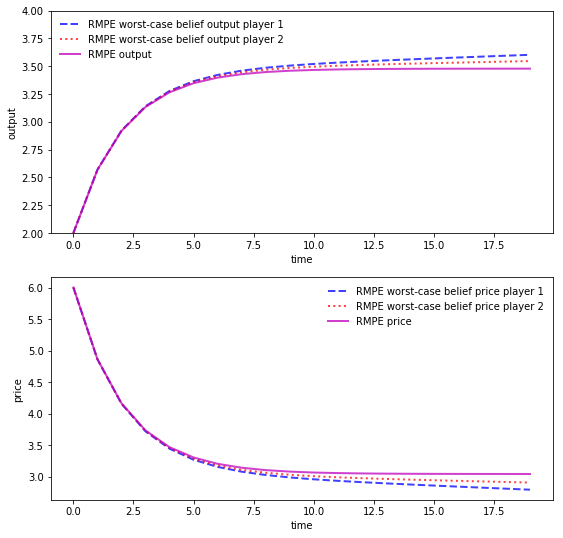

In [10]:
# == Plot == #
fig, axes = plt.subplots(2, 1, figsize=(9, 9))

ax = axes[0]
ax.plot(qrp1, 'b--', lw=2, alpha=0.75, label='RMPE worst-case belief output player 1')
ax.plot(qrp2, 'r:', lw=2, alpha=0.75, label='RMPE worst-case belief output player 2')
ax.plot(qr, 'm-', lw=2, alpha=0.75, label='RMPE output')
ax.set(ylabel="output", xlabel="time", ylim=(2, 4))
ax.legend(loc='upper left', frameon=0)

ax = axes[1]
ax.plot(prp1, 'b--', lw=2, alpha=0.75, label='RMPE worst-case belief price player 1')
ax.plot(prp2, 'r:', lw=2, alpha=0.75, label='RMPE worst-case belief price player 2')
ax.plot(pr, 'm-', lw=2, alpha=0.75, label='RMPE price')
ax.set(ylabel="price", xlabel="time")
ax.legend(loc='upper right', frameon=0)
plt.show()

We see from the above graph that under robustness concerns, player 1 and
player 2  have heterogeneous beliefs about total  output and the goods  price
even though they share the same baseline model and information

> - firm 1 thinks that total output will be higher and price lower than does firm 2  
- this leads firm 1 to produce less than firm 2  



These beliefs justify (or **rationalize**) the Markov perfect equilibrium  robust decision rules

This means that the robust rules are the unique **optimal** rules (or best responses) to the indicated worst-case transition dynamics

([[HS08]](https://lectures.quantecon.org/py/zreferences.html#hansensargent2008) discuss how this property of robust decision rules is connected to the concept of *admissibility* in Bayesian statistical decision theory)